# PyTorch Practice
**Due: Mondy, 10/24/2022, 2:15 PM**

Welcome to your fifth assignment. You will create and train neural networks using a deep learning framework ([PyTorch](https://pytorch.org/)).

Contents:

1. (20%) Exercise 1: Load CIFAR10 Dataset
2. (10%) Exercise 2: Create Neural Network Model
4. (5%) Exerise 3.1: Build DataLoaders
5. (5%) Exercise 3.2: Training in One Epoch
6. (20%) Exercise 3.3: Training Iterations
7. (40%) Exercise 4: Custom Images Test

Instructions:
- The code between the ### START CODE HERE ### and ### END CODE HERE ### comments will be graded.
- **Change variable names at your own risk. Make sure you understand what you are doing.**
- Avoid using for-loops and while-loops, unless you are explicitly asked to do so.

You will learn:
- PyTorch built-in datasets.
- Create neural network models using `nn` module.
- Train neural network model with handy pre-defined loss functions and optimizers.


## Import Libraries
PyTorch has two [primitives to work with data](https://pytorch.org/docs/stable/data.html):
``torch.utils.data.DataLoader`` and ``torch.utils.data.Dataset``.
``Dataset`` stores the samples and their corresponding labels, and ``DataLoader`` wraps an iterable around
the ``Dataset``.

**If you installed [PyTorch]((https://pytorch.org/get-started/locally/)) using Conda, you may want to [switch Python interpreter](https://code.visualstudio.com/docs/python/environments) to comply with the Conda environment that hosts PyTorch.**

In [2]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.io import read_image
from torchvision.transforms import ToTensor, Resize
import matplotlib.pyplot as plt
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
%matplotlib inline

## 1 - Load Dateset
#### **(20%) Exercise 1**: Load CIFAR10 Dataset
Load CIFAR10 dataset from TorchVision datasets. 
1. Create a training dataset.
2. Create a test dataset.
3. Inspect the training dataset.
4. Visualize samples from the training dataset.

> **Hint:** 
Usually, an image is numerically represented by `(# height pixels, # width pixels, # color channels)`. PyTorch, however, represents an image with a different order `(# color channels, # height pixels, # width pixels)`. You may find `torch.permute()` function useful if trying to show pictures in `Matplotlib`. 

In [3]:
# Create datasets
### START CODE HERE ###
training_data = datasets.CIFAR10(
        root="data", 
        train=True, 
        transform=ToTensor(),
        download=True, 
    )  # Create training data from open datasets.
test_data = datasets.CIFAR10(
        root="data",
        train=False,
        transform=ToTensor(),
        download=False,
      )  # Create test data from open datasets.
### END CODE HERE ###

# Investigate datasets
### START CODE HERE ###
num_train = len(training_data)  # number of training examples
res_train = training_data[0][0].size()  # training image resolution
num_test = len(test_data)  # number of test examples   
res_test = test_data[0][0].size() # test image resolution
### END CODE HERE ###

print(f"number of training examples: {num_train}")
print(f"training image resolution (CHANNEL, HEIGHT, WIDTH): {res_train}")
print(f"number of test examples: {num_test}")
print(f"test image resolution (CHANNEL, HEIGHT, WIDTH): {res_test}")


# Visulization
labels_map = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck',
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    ### START CODE HERE ###
    img, label = training_data[sample_idx][0], training_data[sample_idx][1]
    img_perm = torch.permute(img, (1, 2, 0))  # you may want to permute order of the axes in img
    ### END CODE HERE ###
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img_perm.squeeze(), cmap="gray")


Files already downloaded and verified
number of training examples: 50000
training image resolution (CHANNEL, HEIGHT, WIDTH): torch.Size([3, 32, 32])
number of test examples: 10000
test image resolution (CHANNEL, HEIGHT, WIDTH): torch.Size([3, 32, 32])


IndexError: Dimension out of range (expected to be in range of [-3, 2], but got 3)

<Figure size 800x800 with 0 Axes>

> **Expected Results:**
```console
number of training examples: 50000
training image resolution (CHANNEL, HEIGHT, WIDTH): torch.Size([3, 32, 32])
number of test examples: 10000
test image resolution (CHANNEL, HEIGHT, WIDTH): torch.Size([3, 32, 32])
```


--------------


## 2 - Build the Model
#### **(10%) Exercise 2**: Create Neural Network Model
Define a neural network model class from [nn.Module](https://pytorch.org/docs/stable/generated/torch.nn.Module.html). The NN model contains 3 layers (2 hidden layers and 1 output layer).
- Define the layers of the model in `__init__` function (define a helper function: `flatten`).
- Define how data will pass through the model in the `forward` function (use `flatten` function to reshape the inputs). 
- (Optional) Move the operations to GPU if available.


In [9]:
class NeuralNetwork(nn.Module):

    def __init__(self, hidden_layer_sizes):
        """
        Structure of the neural network model

        Arguments:
            hiddent_layer_sizes -- python list, contains two values to indicate number of neurons in the first and second hiddent layer
        """

        super().__init__()
        self.flatten = nn.Flatten()
        ### START CODE HERE ###
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(32 * 32 * 3, 100),
            nn.ReLU(),
            nn.Linear(10 * 10, 200),
            nn.ReLU(),
            nn.Linear(10 * 20, 10))
        ### END CODE HERE ###
    
    def forward(self, inputs):
        ### START CODE HERE ###
        x = self.flatten(inputs)
        logits = self.linear_relu_stack(x)
        ### END CODE HERE ###
    
        return logits


# Test/Usage
model = NeuralNetwork([100, 200])
print(model)

X = torch.rand(1, 3, 32, 32)
logits = model(X)  # DO NOT call model.forward()
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted probabilities: \n{pred_probab}")
print(f"Predicted classes: {y_pred}: {labels_map[int(y_pred)]}")


NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=3072, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=200, bias=True)
    (3): ReLU()
    (4): Linear(in_features=200, out_features=10, bias=True)
  )
)
Predicted probabilities: 
tensor([[0.0906, 0.1013, 0.1041, 0.1044, 0.0954, 0.0921, 0.1114, 0.0877, 0.1031,
         0.1099]], grad_fn=<SoftmaxBackward0>)
Predicted classes: tensor([6]): frog


> **Expected:**
```console
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=3072, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=200, bias=True)
    (3): ReLU()
    (4): Linear(in_features=200, out_features=10, bias=True)
  )
)
Predicted probabilities: 
tensor([[0.0893, 0.0994, 0.0983, 0.0990, 0.0937, 0.0988, 0.1027, 0.1051, 0.1146,
         0.0991]], grad_fn=<SoftmaxBackward0>)
Predicted classes: tensor([8]): ship
```

> To use the model, we pass it the input data. This executes the model’s `forward`, along with some [background operations](https://github.com/pytorch/pytorch/blob/270111b7b611d174967ed204776985cefca9c144/torch/nn/modules/module.py#L866). Do not call `model.forward()` directly!

> Calling the model on the input returns a 2-dimensional tensor with dim=0 corresponding to each output of 10 raw predicted values for each class, and dim=1 corresponding to the individual values of each output. We get the prediction probabilities by passing it through an instance of the `nn.Softmax` module.

> Read more about [building neural networks in PyTorch](https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html).




--------------


## 3- Optimize the Model Parameters

#### **(5%) Exercise 3.1**: Build DataLoaders
Pass the `Dataset` as an argument to `DataLoader`. This wraps an iterable over the dataset, and supports
automatic batching, sampling, shuffling and multiprocess data loading. 
- Create a `DataLoader` for `training_data` with default batch size of 64.
- Create a `DataLoader` for `test_data` with default batch size of 64.

> **Update the `batch_size` later if needed**

In [10]:
### START CODE HERE ###
train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)
### END CODE HERE ###


# Test
i = 1
for X, y in test_dataloader:
    print(f"Shape of X in batch {i} [N, C, H, W]: {X.shape}")
    print(f"Shape of y in batch {i}: {y.shape} {y.dtype}")
    i += 1
    # break


Shape of X in batch 1 [N, C, H, W]: torch.Size([64, 3, 32, 32])
Shape of y in batch 1: torch.Size([64]) torch.int64
Shape of X in batch 2 [N, C, H, W]: torch.Size([64, 3, 32, 32])
Shape of y in batch 2: torch.Size([64]) torch.int64
Shape of X in batch 3 [N, C, H, W]: torch.Size([64, 3, 32, 32])
Shape of y in batch 3: torch.Size([64]) torch.int64
Shape of X in batch 4 [N, C, H, W]: torch.Size([64, 3, 32, 32])
Shape of y in batch 4: torch.Size([64]) torch.int64
Shape of X in batch 5 [N, C, H, W]: torch.Size([64, 3, 32, 32])
Shape of y in batch 5: torch.Size([64]) torch.int64
Shape of X in batch 6 [N, C, H, W]: torch.Size([64, 3, 32, 32])
Shape of y in batch 6: torch.Size([64]) torch.int64
Shape of X in batch 7 [N, C, H, W]: torch.Size([64, 3, 32, 32])
Shape of y in batch 7: torch.Size([64]) torch.int64
Shape of X in batch 8 [N, C, H, W]: torch.Size([64, 3, 32, 32])
Shape of y in batch 8: torch.Size([64]) torch.int64
Shape of X in batch 9 [N, C, H, W]: torch.Size([64, 3, 32, 32])
Shape of

> **Expected:**
```console
Shape of X in batch 1 [N, C, H, W]: torch.Size([64, 3, 32, 32])
Shape of y in batch 1: torch.Size([64]) torch.int64
Shape of X in batch 2 [N, C, H, W]: torch.Size([64, 3, 32, 32])
Shape of y in batch 2: torch.Size([64]) torch.int64
...
Shape of X in batch 156 [N, C, H, W]: torch.Size([64, 3, 32, 32])
Shape of y in batch 156: torch.Size([64]) torch.int64
Shape of X in batch 157 [N, C, H, W]: torch.Size([16, 3, 32, 32])
Shape of y in batch 157: torch.Size([16]) torch.int64
```


#### **(5%) Exercise 3.2**: Training in One Epoch
Define the `train` function to loop all the batches in the DataLoader. In a single training loop, 
1. the model makes predictions on the training minibatches: `model(inputs)`, 
2. compute prediction error: `loss_fn(predictions, labels)`,
3. backpropagate to obtain the gradients of the model's parameters: `loss.backward()`,
4. update the model's parameters with the specified optimizer: `optimizer.step()`,


In [11]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction error
        ### START CODE HERE ###
        pred = model(X)  # forward propagation
        loss = loss_fn(pred, y)  # compute loss
        optimizer.zero_grad()  # zero previous gradient
        loss.backward()  # back propagatin
        optimizer.step()  # update parameters
        ### END CODE HERE ###
        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


# Define a test function to evaluate model performance
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, accuracy = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            # X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            accuracy += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    accuracy /= size
    print(f"Test Error: \n Accuracy: {(100*accuracy):>0.1f}%, Avg loss: {test_loss:>8f} \n")

    return accuracy


#### **(20%) Exercise 3.3**: Training Iterations
The training process is conducted over several iterations (*epochs*). During each epoch, the model learns
parameters to make better predictions. Log the model's accuracy and loss at each epoch; we'd like to see the
accuracy increase and the loss decrease with every epoch.

To start a training process:
1. initialize neural network model with your choice of hidden layer sizes,
2. define cross-entropy loss function,
3. specify Adam optimizer with your choice of learning rate to update the model's parameters,
4. set total number of training epochs.

You are expected to obtain a growing accuracy curve. 
> **Hint:**
> - Feel free to change whatever hyperparameters to increase the test accuracy
> - You can choose different `batch_size`

In [12]:
# Start training
### START CODE HERE ###
cifar_model = NeuralNetwork(100)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cifar_model.parameters(), lr=1e-3)
epochs = 4
### END CODE HERE ###
test_acc = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, cifar_model, loss_fn, optimizer)
    acc = test(test_dataloader, cifar_model, loss_fn)
    test_acc.append(acc)
print("Done!")


plt.plot(test_acc)


Epoch 1
-------------------------------
loss: 2.304517  [    0/50000]
loss: 2.305483  [ 6400/50000]
loss: 2.286084  [12800/50000]
loss: 2.305195  [19200/50000]
loss: 2.288111  [25600/50000]
loss: 2.281210  [32000/50000]


KeyboardInterrupt: 

--------------


## 4 - Evaluation
This model can now be used to make predictions. You can change the index of the test example from `test_data` in the following block. 


Predicted: "ship", Actual: "frog"


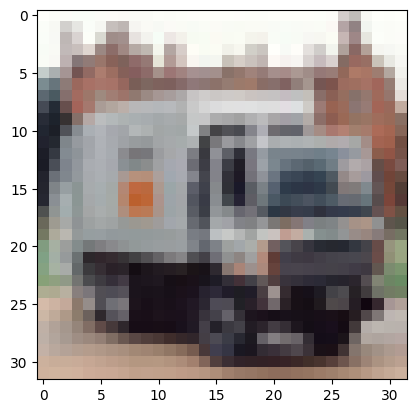

In [21]:
cifar_model.eval()
x, y = test_data[11][0], test_data[4][1]
x = x.unsqueeze(dim=0)
with torch.no_grad():
    pred = cifar_model(x)
    predicted, actual = labels_map[int(pred[0].argmax(0))], labels_map[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')
plt.imshow(x.squeeze().permute(1, 2, 0), cmap="gray")


#### **(40%) Exercise 4**: Test Custom Images
Upload 10 custom pictures to the `images/` directory, one picture for each class. Evaluate and observe the predicted results with the trained model and newly uploaded pictures.   

> **Hints:**
> - To read a image as a torch tensor, check out [`torchvision.io.read_image()`](https://pytorch.org/vision/stable/generated/torchvision.io.read_image.html#torchvision.io.read_image) function.
> - To resize a torch tensor (image), check out ['torchvision.transforms.Resize'](https://pytorch.org/vision/main/generated/torchvision.transforms.Resize.html) class or [this tutorial](https://www.tutorialspoint.com/pytorch-how-to-resize-an-image-to-a-given-size).
> - Images named after `class name.jpg` pattern would be easier to use. For example: `frog.jpg` and `ship.jpg`.


In [13]:

figure = plt.figure()
cols, rows = 2, 5
resize = Resize((32, 32))
to_tensor = ToTensor()
img_tensor = to_tensor(img)
for i in range(1, cols * rows + 1):
    ### START CODE HERE ###
    img = test_data[20][0]  # read image to tensor
    img_resize = resize(img_tensor) # resize image to fit in the nn model
    pred = cifar_model(img_resize)  # make prediction
    img_perm = torch.permute(img, (1, 2, 0))  # permute image axes to compatible with matplotlib
    ### END CODE HERE ###
    figure.add_subplot(rows, cols, i)
    plt.title('label:' + labels_map[i-1] + '\tprediction:' + labels_map[pred])
    plt.axis("off")
    plt.imshow(img_perm.squeeze(), cmap="gray")


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x1024 and 3072x100)

<Figure size 640x480 with 0 Axes>